# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [21]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [22]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [39]:
print("Información básica del dataset:")
print("Shape (filas, columnas):", df_airbnb.shape)
print("Columnas:", df_airbnb.columns)

Información básica del dataset:
Shape (filas, columnas): (13232, 9)
Columnas: Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')


In [40]:
print("Tipos de datos por columna:")
print(df_airbnb.dtypes)

Tipos de datos por columna:
room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object


In [41]:
print("Valores faltantes por columna:")
print(df_airbnb.isnull().sum())

Valores faltantes por columna:
room_id                  0
host_id                  0
room_type                0
neighborhood             0
reviews                  0
overall_satisfaction    10
accommodates             0
bedrooms                 0
price                    0
dtype: int64


In [42]:
print("Resumen estadístico de las columnas:")
print(df_airbnb.describe())

Resumen estadístico de las columnas:
            room_id       host_id       reviews  overall_satisfaction  \
count  1.323200e+04  1.323200e+04  13232.000000          13222.000000   
mean   1.055081e+07  3.616444e+07     29.130063              3.284677   
std    6.069884e+06  3.706975e+07     42.802762              2.123236   
min    6.499000e+03  1.445500e+04      0.000000              0.000000   
25%    5.054848e+06  6.197930e+06      2.000000              0.000000   
50%    1.166226e+07  2.207571e+07     11.000000              4.500000   
75%    1.609631e+07  5.546697e+07     39.000000              5.000000   
max    1.940072e+07  1.359156e+08    438.000000              5.000000   

       accommodates      bedrooms         price  
count  13232.000000  13232.000000  13232.000000  
mean       3.917775      1.549501     86.592352  
std        2.293757      1.062821    135.208926  
min        1.000000      0.000000     10.000000  
25%        2.000000      1.000000     45.000000  
50%  

In [43]:
print("Distribución de valores en las columnas categóricas:")
print(df_airbnb['room_type'].value_counts())
print(df_airbnb['neighborhood'].value_counts())
print("\n")

Distribución de valores en las columnas categóricas:
room_type
Entire home/apt    9764
Private room       3297
Shared room         171
Name: count, dtype: int64
neighborhood
Santa Maria Maior          2798
Misericórdia               2402
Arroios                    1664
Santo António              1105
São Vicente                1041
Estrela                     803
Avenidas Novas              566
Penha de França             407
Campo de Ourique            319
Areeiro                     280
Belém                       254
Alvalade                    253
Parque das Nações           250
Alcântara                   213
São Domingos de Benfica     138
Lumiar                      124
Campolide                   123
Ajuda                       108
Olivais                     108
Beato                        84
Benfica                      71
Marvila                      51
Carnide                      47
Santa Clara                  23
Name: count, dtype: int64




In [44]:
print("Valores únicos por columna:")
print(df_airbnb.nunique())

Valores únicos por columna:
room_id                 13232
host_id                  6418
room_type                   3
neighborhood               24
reviews                   267
overall_satisfaction        9
accommodates               16
bedrooms                   11
price                     282
dtype: int64


### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso. 


Nota: 
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [48]:
opciones = df_airbnb[(df_airbnb['reviews'] > 10) & (df_airbnb['overall_satisfaction'] > 4) & (df_airbnb['bedrooms'] >= 2)]
opciones = opciones.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])
alternativas = opciones.head(3)

print("Alternativas")
print(alternativas[['room_id', 'neighborhood', 'reviews', 'overall_satisfaction', 'bedrooms', 'price']])


Alternativas
     room_id       neighborhood  reviews  overall_satisfaction  bedrooms  \
120   176153       Misericórdia      438                   5.0       2.0   
16     44043  Santa Maria Maior      316                   5.0       3.0   
140   202150  Santa Maria Maior      274                   5.0       2.0   

     price  
120  102.0  
16    80.0  
140   62.0  


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [58]:
propiedades = df_airbnb[df_airbnb['room_id'].isin([97503, 90387])]
propiedades.to_excel("roberto.xlsx", index=False)

print("Propiedades de Roberto y Clara:")
print(propiedades[['room_id', 'host_id', 'reviews', 'overall_satisfaction', 'neighborhood']])


Propiedades de Roberto y Clara:
    room_id  host_id  reviews  overall_satisfaction   neighborhood
41    90387   490050      204                   5.0  Santo António
48    97503   515924       39                   4.0  Santo António



#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [60]:
presupuesto = df_airbnb[df_airbnb['price'] <= 50]

shared_rooms = presupuesto[presupuesto['room_type'] == 'Shared room']
shared_rooms_ordenadas = shared_rooms.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

otras_propiedades = presupuesto[presupuesto['room_type'] != 'Shared room']
otras_propiedades_ordenadas = otras_propiedades.sort_values(by='price')

top_10 = pd.concat([shared_rooms_ordenadas, otras_propiedades_ordenadas]).head(10)

print("Las 10 propiedades más baratas dentro del presupuesto de Diana:")
print(top_10[['room_id', 'room_type', 'price', 'overall_satisfaction', 'reviews', 'neighborhood']])


Las 10 propiedades más baratas dentro del presupuesto de Diana:
       room_id    room_type  price  overall_satisfaction  reviews  \
7034  12268067  Shared room   16.0                   5.0       96   
7060  12299998  Shared room   13.0                   5.0       49   
7066  12305540  Shared room   13.0                   5.0       40   
6399  11278059  Shared room   22.0                   5.0       27   
3663   5725814  Shared room   21.0                   5.0       23   
4911   7722107  Shared room   36.0                   5.0       22   
6459  11427995  Shared room   18.0                   5.0       21   
3727   5803348  Shared room   20.0                   5.0       19   
7312  12826213  Shared room   22.0                   5.0       19   
5964  10172929  Shared room   20.0                   5.0       17   

        neighborhood  
7034         Arroios  
7060         Arroios  
7066         Arroios  
6399         Arroios  
3663    Misericórdia  
4911  Avenidas Novas  
6459    Miseric

### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados. 
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


In [71]:
promedio_satisfaccion_barrio = df_airbnb.groupby('neighborhood')['overall_satisfaction'].mean().reset_index()

promedio_satisfaccion_barrio_ordenado = promedio_satisfaccion_barrio.sort_values(by='overall_satisfaction', ascending=False)

print("Promedio de satisfacción por barrio:")
print(promedio_satisfaccion_barrio_ordenado)

Promedio de satisfacción por barrio:
               neighborhood  overall_satisfaction
20        Santa Maria Maior              3.732392
0                     Ajuda              3.722222
15             Misericórdia              3.695035
23              São Vicente              3.561479
12                  Estrela              3.422167
21            Santo António              3.347373
6                     Beato              3.297619
7                     Belém              3.061024
4                   Arroios              3.057797
9          Campo de Ourique              2.996865
16                  Olivais              2.916667
18          Penha de França              2.800983
1                 Alcântara              2.798122
2                  Alvalade              2.648221
17        Parque das Nações              2.534000
14                  Marvila              2.470588
3                   Areeiro              2.360714
5            Avenidas Novas              2.315371
10           

In [70]:
total_reviews_por_tipo = df_airbnb.groupby('room_type')['reviews'].sum().reset_index()

print("Total de críticas por tipo de habitación:")
print(total_reviews_por_tipo)


Total de críticas por tipo de habitación:
         room_type  reviews
0  Entire home/apt   321146
1     Private room    62636
2      Shared room     1667


C:\Users\USER\AppData\Local\Temp\ipykernel_10104\3599673482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overall_satisfaction', y='neighborhood', data=promedio_satisfaccion_barrio_ordenado, palette='coolwarm')


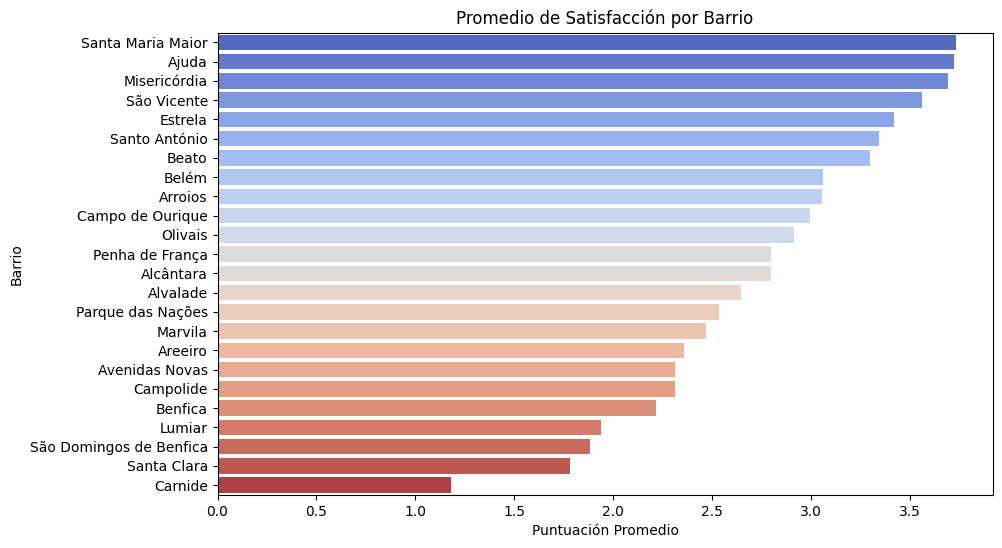

C:\Users\USER\AppData\Local\Temp\ipykernel_10104\3599673482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='reviews', data=total_reviews_por_tipo, palette='viridis')


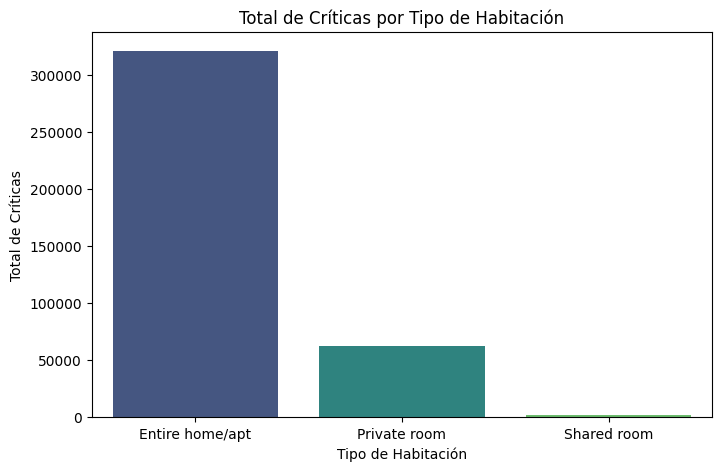

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='overall_satisfaction', y='neighborhood', data=promedio_satisfaccion_barrio_ordenado, palette='coolwarm')
plt.title('Promedio de Satisfacción por Barrio')
plt.xlabel('Puntuación Promedio')
plt.ylabel('Barrio')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='reviews', data=total_reviews_por_tipo, palette='viridis')
plt.title('Total de Críticas por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Total de Críticas')
plt.show()